In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [5]:
tf.test.is_gpu_available()

False

In [6]:
batchsize=16
train_folder = "../prepared_data/train"
test_folder = "../prepared_data/test"
model_folder = "./models/"

In [7]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2, horizontal_flip=True, vertical_flip=True)

train_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 61516 images belonging to 2 classes.
Found 15378 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(test_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 8005 images belonging to 2 classes.


In [9]:
inception_basemodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = inception_basemodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=inception_basemodel.input, outputs= hmodel)
for layer in inception_basemodel.layers:
    layer.trainable = False

In [ ]:
model.summary()

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [13]:
checkpoint = ModelCheckpoint(f'{model_folder}inception3_model0414.h5',
                            monitor='val_loss',save_best_only=True,verbose=2)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 2, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor = 'val_loss', patience=3, verbose= 2,)

callbacks=[checkpoint,earlystop,learning_rate]

In [14]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=10)

Epoch 1/10
3844/3844 [==============================] - ETA: 0s - loss: 0.2293 - accuracy: 0.9096
Epoch 1: val_loss improved from inf to 0.25703, saving model to ./models/inception3_model0414.h5
3844/3844 [==============================] - 356s 92ms/step - loss: 0.2293 - accuracy: 0.9096 - val_loss: 0.2570 - val_accuracy: 0.8837 - lr: 0.0010
Epoch 2/10
3844/3844 [==============================] - ETA: 0s - loss: 0.2048 - accuracy: 0.9189
Epoch 2: val_loss did not improve from 0.25703
3844/3844 [==============================] - 392s 102ms/step - loss: 0.2048 - accuracy: 0.9189 - val_loss: 0.2934 - val_accuracy: 0.8790 - lr: 0.0010
Epoch 3/10
3844/3844 [==============================] - ETA: 0s - loss: 0.1963 - accuracy: 0.9217
Epoch 3: val_loss improved from 0.25703 to 0.25618, saving model to ./models/inception3_model0414.h5
3844/3844 [==============================] - 403s 105ms/step - loss: 0.1963 - accuracy: 0.9217 - val_loss: 0.2562 - val_accuracy: 0.8985 - lr: 0.0010
Epoch 4/10
3

In [15]:
import matplotlib.pyplot as plt

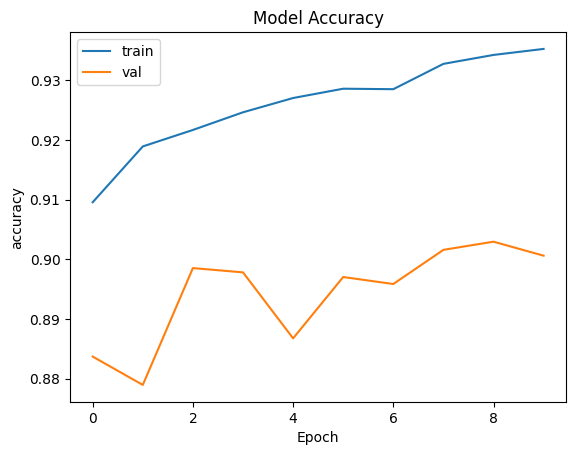

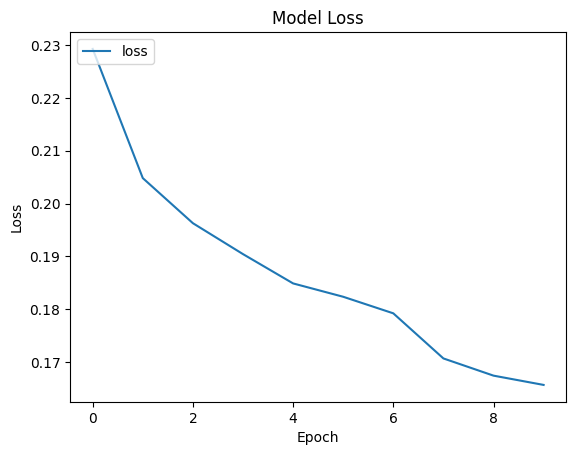

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.legend(['loss'], loc='upper left')
plt.show()

In [17]:
loss_tr, acc_tr = model.evaluate(train_data, verbose=2)
print(acc_tr)
print(loss_tr)

3845/3845 - 281s - loss: 0.1506 - accuracy: 0.9406 - 281s/epoch - 73ms/step
0.9406170845031738
0.15055683255195618


In [18]:
loss_vr, acc_vr = model.evaluate(validation_data, verbose=2)
print(acc_vr)
print(loss_vr)

962/962 - 71s - loss: 0.2452 - accuracy: 0.9011 - 71s/epoch - 73ms/step
0.9010924696922302
0.2451591193675995


In [19]:
loss_test, acc_test = model.evaluate(test_data, verbose=2)
print(acc_tr)
print(loss_tr)

501/501 - 34s - loss: 0.1515 - accuracy: 0.9435 - 34s/epoch - 68ms/step
0.9406170845031738
0.15055683255195618


In [ ]:
# Tweaking

In [20]:
# from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

In [28]:
# model = load_model(f"{model_folder}xception_model0407.h5")

In [21]:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

In [22]:
batchsize = 8
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2, horizontal_flip=True, vertical_flip=True)

train_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(test_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 61516 images belonging to 2 classes.
Found 15378 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [23]:
adam = Adam(learning_rate=0.0001)
model.compile(optimizer="Adam", loss='categorical_crossentropy',metrics=['accuracy'])

history_sgd = model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=10)

Epoch 1/10
7689/7689 [==============================] - ETA: 0s - loss: 0.3423 - accuracy: 0.8919
Epoch 1: val_loss improved from 0.23627 to 0.22312, saving model to ./models/inception3_model0414.h5
7689/7689 [==============================] - 611s 79ms/step - loss: 0.3423 - accuracy: 0.8919 - val_loss: 0.2231 - val_accuracy: 0.9021 - lr: 0.0010
Epoch 2/10
7689/7689 [==============================] - ETA: 0s - loss: 0.2231 - accuracy: 0.9187
Epoch 2: val_loss did not improve from 0.22312
7689/7689 [==============================] - 636s 83ms/step - loss: 0.2231 - accuracy: 0.9187 - val_loss: 0.2245 - val_accuracy: 0.9138 - lr: 0.0010
Epoch 3/10
7689/7689 [==============================] - ETA: 0s - loss: 0.1841 - accuracy: 0.9317
Epoch 3: val_loss did not improve from 0.22312
7689/7689 [==============================] - 650s 85ms/step - loss: 0.1841 - accuracy: 0.9317 - val_loss: 0.2268 - val_accuracy: 0.9175 - lr: 0.0010
Epoch 4/10
7689/7689 [==============================] - ETA: 0s 

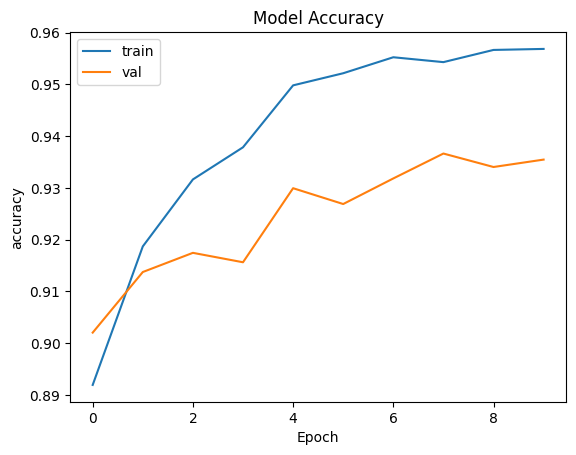

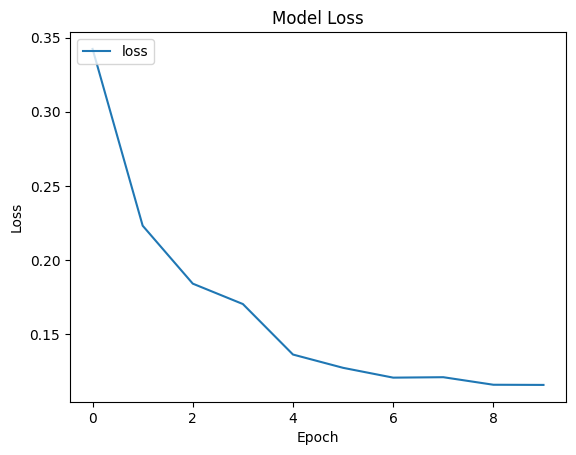

In [24]:
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history_sgd.history['loss'])
plt.legend(['loss'], loc='upper left')
plt.show()

In [25]:
loss_tr, acc_tr = model.evaluate(train_data, verbose=2)
print(acc_tr)
print(loss_tr)

7690/7690 - 303s - loss: 0.1217 - accuracy: 0.9685 - 303s/epoch - 39ms/step
0.968512237071991
0.12166232615709305


In [26]:
loss_vr, acc_vr = model.evaluate(validation_data, verbose=2)
print(acc_vr)
print(loss_vr)

1923/1923 - 88s - loss: 0.1883 - accuracy: 0.9354 - 88s/epoch - 46ms/step
0.9354272484779358
0.18827790021896362


In [27]:
loss_test, acc_test = model.evaluate(test_data, verbose=2)
print(acc_tr)
print(loss_tr)

1001/1001 - 42s - loss: 0.1252 - accuracy: 0.9614 - 42s/epoch - 42ms/step
0.968512237071991
0.12166232615709305


In [15]:
!pip3 install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 466.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 144.6 kB/s eta 0:00:00a 0:00:01


In [39]:
from tensorflow.keras.models import load_model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import cv2
# model = load_model(f"{model_folder}xception_model0413.h5")

In [40]:
def image_pred(image):
    eye = cv2.imread(image)
    eye = cv2.resize(eye,(80,80))
    eye = eye/255
    eye = eye.reshape(80,80,3)
    eye = np.expand_dims(eye,axis=0)
    prediction = model.predict(eye)
    return prediction[0]

In [ ]:
open_eyes_ds = os.listdir(test_folder+"/open_eyes/")
close_eyes_ds = os.listdir(test_folder+"/close_eyes/")
y_pred = []
y_test = []
for each in open_eyes_ds:
    each_eye_pred = image_pred(test_folder+"/open_eyes/"+each)
    y_test.append(1)
    if each_eye_pred[0] > each_eye_pred[1]:
        y_pred.append(0)
    else:
        y_pred.append(1)

for each in close_eyes_ds:
    each_eye_pred = image_pred(test_folder+"/close_eyes/"+each)
    y_test.append(0)
    if each_eye_pred[0] > each_eye_pred[1]:
        y_pred.append(0)
    else:
        y_pred.append(1)

print(y_pred)
print(y_test)

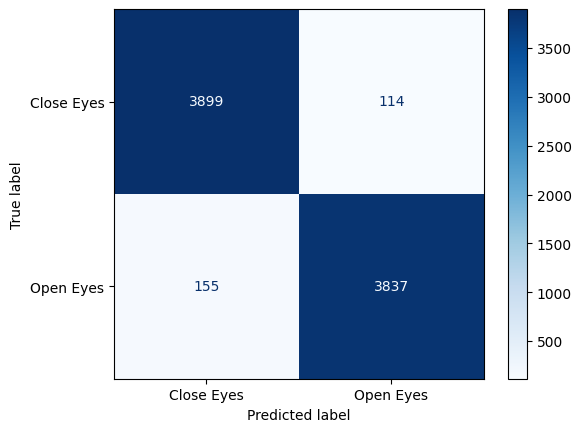

In [31]:
labels = ["Close Eyes", "Open Eyes"]
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()
test_data

In [33]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

7690/7690 [==============================] - 336s 44ms/step - loss: 0.1086 - accuracy: 0.9683
0.1086127832531929
0.9682521820068359


In [41]:
from sklearn.metrics import confusion_matrix

# generate sample confusion matrix
conf_mat = [[3899, 114], 
            [155, 3837]]

# calculate precision for class 1 (index 1)
class_idx0 = 0
TP0 = conf_mat[class_idx0][class_idx0]
FP0 = sum(conf_mat[i][class_idx0] for i in range(len(conf_mat))) - TP0

class_idx1 = 1
TP1 = conf_mat[class_idx1][class_idx1]
FP1 = sum(conf_mat[i][class_idx1] for i in range(len(conf_mat))) - TP1

precision0 = TP0 / (TP0 + FP0)
precision1 = TP1 / (TP1 + FP1)
print("Precision for class ", class_idx0, ": ", precision0)
print("Precision for class ", class_idx1, ": ", precision1)

Precision for class  0 :  0.9617661568820918
Precision for class  1 :  0.9711465451784358


In [42]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  0.9611723446893787


In [43]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9663960024984385


In [44]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)


F1 score:  0.9661337026312476


In [38]:
test_loss, test_accuracy = model.evaluate(test_data, verbose=2)
print(f"Test accuracy:{test_accuracy} and Test Loss: {test_loss}")

KeyboardInterrupt: 